In [1]:
import pandas as pd
import numpy as np
import whois
from urllib.parse import urlencode
from urllib.request import urlopen
from urllib.parse import urlencode
from urllib.request import urlopen

from datetime import datetime
def domainage(url):

   

    try:
        domain_name = urlparse(url).netloc
           #whois query 
        response= whois.whois(domain_name)
#datetime.datetime.today()
        #print(response.creation_date)
        #print("The Domain name's:", response.domain_name)
        #print("Domain Created on: ", response.creation_date)
        #print("Domain Expire date is:", response.expiration_date)
        date=response.creation_date
        
        datee=response.expiration_date
        #print(type(date) is list)
        if((type(datee) is list) or (type(date) is list)):
            #print("bjheb")
            
            if((type(datee) is list) and (type(date) is list)):
                 #print("trur")
                 datee=datee[0].year
                 date=date[0].year
            
            if((type(datee) is list) and ~(type(date) is list)):
                 datee=datee[0].year
                 date=date.year
                 #print(datee)
            if((type(date) is list) and ~(type(datee) is list)):
                 date=date[0].year
                 datee=datee.year
                 #print(date)
             
           
            
            
            ytd=datee - date
            #print(ytd)
            ytd=ytd*365
            #print(ytd)
            dtm=ytd/30
          
            if(dtm < 12):
                return 1
            else:
                return 0
        
        else:
            age = (response.expiration_date - response.creation_date).days 
           
            if age<12:
        
                 return 1
            else:
                 return 0
            
                
             
        
    
    

    #for invalid domain
    except:
       
        return 1 #no domain found

domainage("https://google.com")

1

In [2]:
import pandas as pd
import matplotlib.pyplot as mp
import ipaddress
import re
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime
from tldextract import extract
import requests
import dns.resolver
from urllib.parse import urlencode
from urllib.request import urlopen

col_list=["URL","Label"]
c=0;
g=0;
urld=[]
lens=0
labeld=[]
nol=0
data0 = pd.read_csv("E:\phishingdataset.csv",usecols=col_list)
for i in data0["URL"]:
         
          c=c+1
         
          urld.append(i)
   
print(len(urld))
for i in data0["Label"]:
    if i=="bad":
        labeld.append("1")
    else:
        labeld.append("0")
        
print(len(labeld))
for i in range(0,len(labeld)):
    if labeld[i]=="0":
        lens+=len(urld[i])
        nol=nol+1
        
print(urld[0])
print(labeld[0])
print("average length of legitimate url is :")
print("\n");

print(lens/nol)


print("\n");
print("number of phishing urls : ");
print(549338-nol);
print("\n");
print("number of legitimate urls : ");
print(nol);
#data0.head()


549338
549338
super1000.info/docs
1
average length of legitimate url is :


45.7675122924535


number of phishing urls : 
156414


number of legitimate urls : 
392924


In [3]:
extracted_features = []
label = 0
print("running")
for i in range(66000,67500):
           
    print(i)
    
    url = urld[i]
    features = []
                                           
                                                   
    
    
    features.append(dnss("https://"+url))               
                                                                                                         
      
    features.append(labeld[i])
    extracted_features.append(features)
    print("\n\n\n")
    
print("completed")

running
66000


NameError: name 'dnss' is not defined

In [42]:
def haveAtSign(url):
    if "@" in url:
        at = 1    
    else:
        at = 0    
    return at



In [43]:
def url_of_anchor(url): 
         try:
            SubDom, Dom, Suffix = extract(url) 
            websiteDom = Dom
            opener = urllib.request.urlopen(url).read() 
            soup = BeautifulSoup(opener, 'lxml') 
            anchors = soup.findAll('a', href=True) 
            total = len(anchors) 
            linked_to_same = 0 
            avg = 0 
            for anchor in anchors:
                SubDom, Dom, Suffix = extract(anchor['href']) 
                anchorDom = Dom 
                if(websiteDom==anchorDom or anchorDom==''):
                     linked_to_same = linked_to_same + 1
            linked_outside = total-linked_to_same 
            #print(linked_outside)
            if(total!=0):
                avg = linked_outside/total
            if(avg<0.31):
                return 0   #legitimate
           
            else:
                return 1 #phishing
         except:
              return 1
url_of_anchor("https://www.google.com")

0

In [44]:
def rightClick(url):
    try:
         response=requests.get(url)
         #print(response.text)
         if response == "":
                 return 1
         else:
                 if re.findall(r"event.button == 2", response.text):
                    return 1  #phishing
                 else:
                    return 0 #legitimate
    except:
       
        return 1
    
rightClick("https://www.google.com")

0

In [45]:
def request_url(url):
    try:
        SubDom, Dom, Suffix = extract(url) 
        websiteDom = Dom
        opener = urllib.request.urlopen(url).read() 
        soup = BeautifulSoup(opener, 'lxml') 
        imgs = soup.findAll('img', src=True)
        total = len(imgs)
        linked_to_same = 0 
        avg =0 
        for image in imgs:
            SubDom, Dom, Suffix = extract(image['src']) 
            imageDom = Dom 
            if(websiteDom==imageDom or imageDom==''):
                   linked_to_same = linked_to_same + 1
        vids = soup.findAll('video', src=True) 
        total = total + len(vids)
        for video in vids:
            SubDom, Dom, Suffix = extract(video['src'])
            vidDom = Dom 
            if(websiteDom==vidDom or vidDom==''):
                linked_to_same = linked_to_same + 1 
        linked_outside = total-linked_to_same 
        if(total!=0): 
            avg = linked_outside/total
        if(avg<0.22):
             return 0 #leggitimate
         
        else:
             return 1 #phishing
    except:
         #print("fg")
         return 1 #1 for error

In [46]:
def getLength(url):
    if len(url) < 54:
        length = 0            
    else:
        length = 1            
    return length

In [47]:
def redirection(url):
    pos = url.rfind('//')
    if pos > 5:
        if pos > 6:
            return 1
        else:
            return 0
    else:
        return 0
redirection("https:hdnmj.com")

0

In [48]:
def httpDomain(url):
    domain = urlparse(url).netloc
    
    if 'https' in domain:
        return 1 #phishing
    else:
        return 0
httpDomain("https:hdnmj.com")   

0

In [49]:
def tinyURL(url):
    shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [50]:
def iframe(url):
    try:
        SubDom, Dom, Suffix = extract(url) 
        websiteDom = Dom
        opener = urllib.request.urlopen(url).read() 
        soup = BeautifulSoup(opener, 'lxml') 
        iframes = soup.findAll('iframe', src=True)
        total = len(iframes)
        linked_to_same = 0 
        avg =0 
        for fr in iframes:
            SubDom, Dom, Suffix = extract(fr['src']) 
            frDom = Dom 
            if(websiteDom==frDom or frDom==''):
                   linked_to_same = linked_to_same + 1
            
        linked_outside = total-linked_to_same
        
        if(total!=0): 
            avg = linked_outside/total
            #print(avg)
        if(avg<0.22):
             return 0 #leggitimate
         
        else:
             return 1 #phishing
    except:
        #print("ndn")
        return 1
        


In [52]:
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0  

In [53]:
def dots(url):
    domain = urlparse(url).netloc
    #print(domain)
    x=domain.count('.')
    if x>3:
        return 1
    else:
        return 0

In [54]:
def mailto(url):
   
      
    try:
        opener = urllib.request.urlopen(url).read() 
        soup = BeautifulSoup(opener, 'lxml') 
        #print(soup)
      
        
        if(soup.findAll('mailto:')):
            return 1
        else:
            return 0
    except:
        return 1 #url not found ,phishing
        
    
   
    
mailto("https://google.com")  

0

In [55]:
def register(url):
    SubDom, Dom, Suffix = extract(url)
    
   
    c= Dom+"." + Suffix
    #print(c)
   # c=c.replace("www.","")
    #print(c)
    try:
        whois.whois(c)
        return 0
    except:
        #print("error register")
        return 1
    
        
register("https://google.com")   

0

In [56]:
def popup(url):
    try:
        response=requests.get(url)
        
        if response=="":
                return 1
        else:
             if re.findall(r"alert\(",response.text):
                    return 1
             else:
                    return 0
    except:
        
        return 1
    


In [57]:
import dns.resolver
# Finding A record
def dnss(url):
    SubDom, Dom, Suffix = extract(url)
    #print(Dom)
    c=Dom+"." + Suffix
    try:
        result = dns.resolver.resolve(c, 'A')
        return 0
    except:
        return 1
      

  
# Printing record
dnss("https://www.geeksforgeeks.org")


0

In [58]:
def sfh(u):
    try:
        programhtml = requests.get(u).text
        s = BeautifulSoup(programhtml,"lxml")
    
        f = str(s.form)
        ac = f.find("action")
        if(ac!=-1):
            i1 = f[ac:].find(">")
            u1 = f[ac+8:i1-1]
            if(u1=="" or u1=="about:blank"):
                return -1
            er1 = extract(u)
            upage = er1.domain
            erl2 = extract(u1)
            usfh = erl2.domain
            if upage in usfh:
                return 1
            return 0
        else:
           
            return 1
    except:
        
        return 1

In [59]:
def forwarding(url):
    try:
        
        response=requests.get(url)
        #print(response.history)
        if response == "":
             return 1
        else:
            #print(response.history)
            if len(response.history) <= 2:
                return 0
            else:
                return 1
    except:
        
        return 1
  

In [60]:
def havingIp(url):
    z=[]
    domain = urlparse(ii).netloc
    #print(domain)
    
   
    
    try:
        ipaddress.ip_address(domain)
      
        ip = 1
    except:

        
        ip = 0
    return ip

ii="https://super1000.info/docs";
havingIp(ii)

0

In [61]:
#rank of the url  --10
import urllib
import html5lib
from xml.etree import ElementTree
import xmltodict

def web_traffic(url):
   
        
    try:
        url = urllib.parse.quote(url)
       
        rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml")
    
        #print(rank)
        x=rank.find("REACH")["RANK"]
        
        
        
        if int(x)<100000:
             
             return 0
        else:
             #print("phi")
             return 1 #phishing
    except:
        
        return 1
       # rank=rank.find["REACH"]['RANK']
web_traffic("https://google.com")

0

In [6]:
feature_names = [ 'rightclick','Label']

df1 = pd.DataFrame(extracted_features, columns= feature_names)
print(df1)


Empty DataFrame
Columns: [rightclick, Label]
Index: []


In [7]:
df1.to_csv('df1p.csv', index= False)

In [30]:
#model
from sklearn.model_selection import train_test_split
import pandas as pd
 
df=pd.read_csv(r"D:\academics\ISM\final_dataset1.csv")
print(df.head(5))
y = df['label']


X = df.drop(['label'],axis=1)



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42 )


   domain_age  having IP  having_@  lebgth_of_url  redirection_//  httpdomain  \
0           1          0         0              0               0           0   
1           0          0         0              1               0           0   
2           0          0         0              0               0           0   
3           0          0         0              1               0           0   
4           0          0         0              1               0           0   

   shortUrl  prefixsuffix  dots  dns recored  register  iframe  rightClick  \
0         0             0     0            1         0       1           1   
1         0             0     0            0         0       1           0   
2         0             0     0            1         0       1           1   
3         0             0     0            0         0       1           0   
4         0             0     0            0         0       1           1   

   popup  forwarding  sfh  url_of_anchor  ma

In [31]:
print(X)

       domain_age  having IP  having_@  lebgth_of_url  redirection_//  \
0               1          0         0              0               0   
1               0          0         0              1               0   
2               0          0         0              0               0   
3               0          0         0              1               0   
4               0          0         0              1               0   
...           ...        ...       ...            ...             ...   
19995           0          0         0              0               0   
19996           0          0         0              0               0   
19997           1          0         0              0               0   
19998           0          0         0              0               0   
19999           0          0         0              0               0   

       httpdomain  shortUrl  prefixsuffix  dots  dns recored  register  \
0               0         0             0     0  

Training Score: 0.8579375
Testing Score: 0.85225


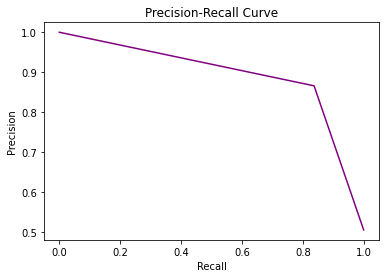

In [32]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
#random forest
rfc = RandomForestClassifier(n_estimators = 2400,criterion='gini', random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
#print(preds)
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Testing Score: {rfc.score(X_test, y_test)}')
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred )

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

DecisionTreeClassifier(random_state=42) Training Score: 0.8579375
DecisionTreeClassifier(random_state=42) Testing Score: 0.851


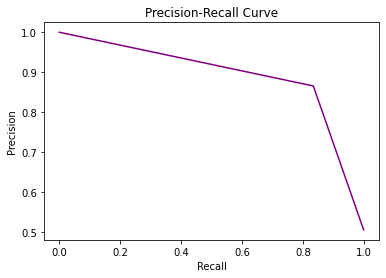

In [33]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier(random_state=42)
    
    # fit to data
model.fit(X_train, y_train)
    
    
y_pred = model.predict(X_test)

   
print(f'{model} Training Score: {model.score(X_train, y_train)}')
print(f'{model} Testing Score: {model.score(X_test, y_test)}')



from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred )

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression, LinearRegression
model =LogisticRegression()
    
    # fit to data
model.fit(X_train, y_train)
    
    # make predictions
preds = model.predict(X_test)

    # print results
print(f'{model} Training Score: {model.score(X_train, y_train)}')
print(f'{model} Testing Score: {model.score(X_test, y_test)}')




LogisticRegression() Training Score: 0.7675625
LogisticRegression() Testing Score: 0.769


In [35]:
model =LinearRegression()
    
    # fit to data
model.fit(X_train, y_train)
    
    # make predictions
preds = model.predict(X_test)

    # print results
print(f'{model} Training Score: {model.score(X_train, y_train)}')
print(f'{model} Testing Score: {model.score(X_test, y_test)}')


LinearRegression() Training Score: 0.4013079100938327
LinearRegression() Testing Score: 0.3983635017875927


Training Score: 0.7733125
Testing Score: 0.77975


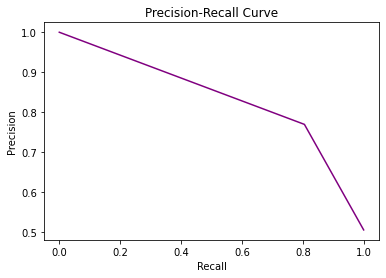

In [36]:
from sklearn.svm import SVC

# kernel to be set linear as it is binary class
classifier = SVC(kernel='linear')

# traininf the model
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score


print(f'Training Score: {classifier.score(X_train, y_train)}')
print(f'Testing Score: {classifier.score(X_test, y_test)}')


from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred )

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

accuracy score for training data 0.8530625
accuracy score for testing data 0.8485


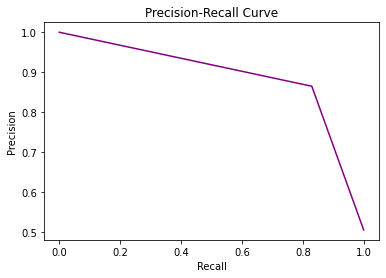

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
m1 = MLPClassifier(hidden_layer_sizes=(9, 12, 10, 15), activation='relu', solver='adam', max_iter=2000)
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
#print("confusion matrix:",confusion_matrix(y_test,predicted_values))
print("accuracy score for training data",m1.score(X_train,y_train))
print("accuracy score for testing data",m1.score(X_test,y_test))


from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred )

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [38]:
#hybrid ensemble  model
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('MLP1',MLPClassifier(hidden_layer_sizes=(9, 12, 10, 15), activation='relu', solver='adam', max_iter=2000)))
estimator.append(('MLP2',MLPClassifier(hidden_layer_sizes=(9, 12, 10, 15), activation='relu', solver='adam', max_iter=2000)))
estimator.append(('MLP3',MLPClassifier(hidden_layer_sizes=(9, 12, 10, 15), activation='relu', solver='adam', max_iter=2000)))
estimator.append(('MLP4',MLPClassifier(hidden_layer_sizes=(9, 12, 10, 15), activation='relu', solver='adam', max_iter=2000)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('SVC1', SVC(gamma ='auto', probability = True)))
estimator.append(('SVC2', SVC(gamma ='auto', probability = True)))
estimator.append(('SVC3', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier(criterion='gini',random_state=42)))
estimator.append(('DTC1', DecisionTreeClassifier(criterion='gini',random_state=42)))
estimator.append(('DTC2', DecisionTreeClassifier(criterion='gini',random_state=42)))
estimator.append(('DTC3', DecisionTreeClassifier(criterion='gini',random_state=42)))
estimator.append(('DTC4', DecisionTreeClassifier(criterion='gini',random_state=42)))
estimator.append(('RFC', RandomForestClassifier(n_estimators = 1400,criterion='gini', random_state=42)))
estimator.append(('RFC1', RandomForestClassifier(n_estimators = 1400,criterion='gini', random_state=42)))
estimator.append(('RFC2', RandomForestClassifier(n_estimators = 1400,criterion='gini', random_state=42)))
estimator.append(('RFC3', RandomForestClassifier(n_estimators = 1400,criterion='gini', random_state=42)))
estimator.append(('RFC4', RandomForestClassifier(n_estimators = 1400,criterion='gini', random_state=42)))

vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)

# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score",score)

#confusion matrix
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix\n",cm)

Hard Voting Score 0.85375
confusion matrix
 [[1720  261]
 [ 324 1695]]


In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#precision
print("precision score is :",round(metrics.precision_score(y_test, y_pred),2))

#recall
print("Recall score is :",round(metrics.recall_score(y_test, y_pred),2))

precision = metrics.precision_score(y_test, y_pred)
recall=metrics.recall_score(y_test, y_pred)

#f1 score
F1 = 2 * (precision * recall) / (precision + recall)

print("F1 score is : ",round(F1,2))

#mse
print("Mean squared error is :",round(mean_squared_error(y_test,y_pred),2))

#rmse
print("Root Mean squared error is :",round(sqrt(mean_squared_error(y_test,y_pred)),2))

precision score is : 0.87
Recall score is : 0.84
F1 score is :  0.85
Mean squared error is : 0.15
Root Mean squared error is : 0.38


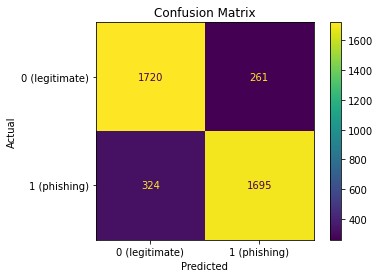

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0 (legitimate)', '1 (phishing)'])
cmd_obj.plot()

cmd_obj.ax_.set(
                title='Confusion Matrix', 
                xlabel='Predicted', 
                ylabel='Actual')

plt.show()

In [ ]:
features=[]
extracted_features=[]
url=input("Enter url : " )

features.append(domainage("https://"+url))
features.append(havingIp("https://"+url))   
features.append(haveAtSign("https://"+url))  
features.append(getLength("https://"+url)) 
features.append(redirection("https://"+url))
features.append(httpDomain("https://"+url))
features.append(tinyURL("https://"+url))
features.append(prefixSuffix("https://"+url))
features.append(dots("https://"+url))
features.append(dnss("https://"+url))
features.append(register("https://"+url))
features.append(iframe("https://"+url))
features.append(rightClick("https://"+url))
features.append(popup("https://"+url))
features.append(forwarding("https://"+url))
features.append(sfh("https://"+url))
features.append(url_of_anchor("https://"+url))   
features.append(mailto("https://"+url)) 
features.append(web_traffic("https://"+url))
extracted_features.append(features)
preds = vot_hard.predict(extracted_features)
if(preds==0):
    print("legitimate")
else:
    print("malicious url")

In [ ]:
print(extracted_features)
preds = vot_hard.predict(X_test)
preds

In [ ]:
X_test

In [ ]:
# Importing the required libraries
from matplotlib import pyplot as plt

# Preparing the data to plot
models = ['Multilayer \nperceptron', '    Super vector\n machine', '    Decision tree','         Random \nforest','            Proposed model']
score = [84.9,77.9,85.1,85.2,85.375]


# Creating a simple bar chart
plt.bar(models, score, width=0.2, bottom=0, align='edge')

plt.title('Accuracy score in different model')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Score in %', fontsize=15)
plt.show()




In [ ]:
# Importing the required libraries
from matplotlib import pyplot as plt

# Preparing the data to plot
blogs = ['Malicious URL','Legitimate URL']
posts = [10000,10000]


# Creating a simple bar chart
plt.bar(blogs, posts, width=0.4, bottom=60, align='edge',color=[ 'red', 'green'])


plt.xlabel('Types of URL', fontsize=15)
plt.ylabel('Number of URLs', fontsize=15)
plt.show()




In [ ]:

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred )

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()